## Xtern AI Assessment

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
df = pd.read_excel('XTern 2024 Artificial Intelegence Data Set.xlsx')
df.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


## EDA

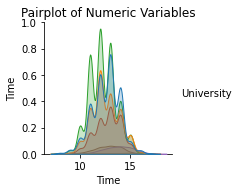

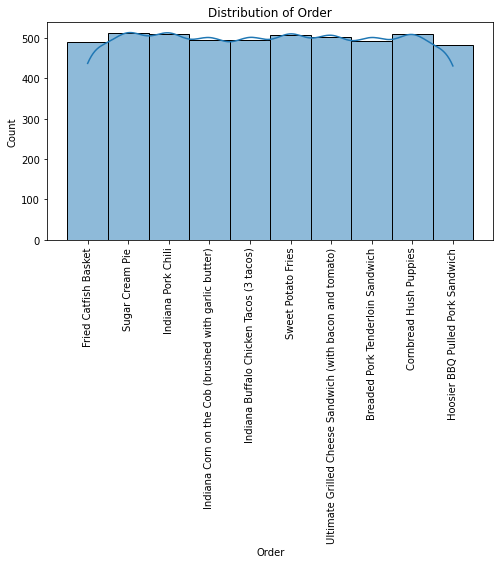

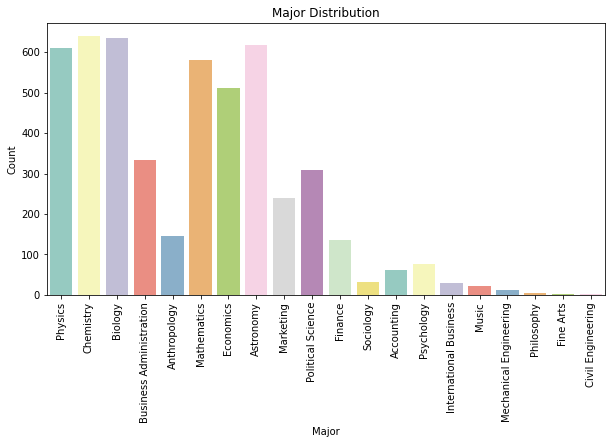

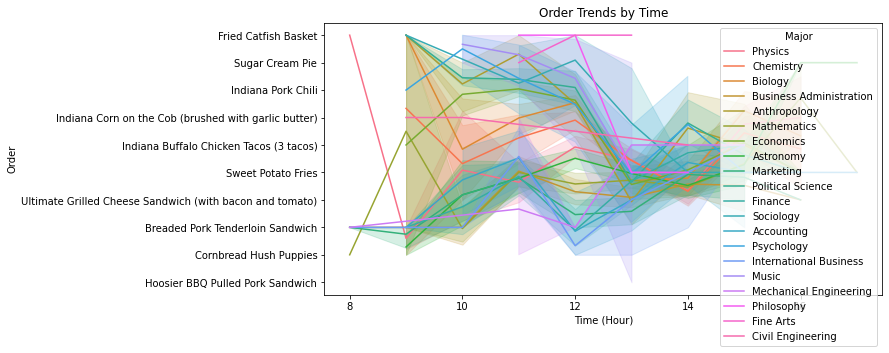

In [17]:


# Pairplot to visualize relationships between numeric variables
sns.pairplot(df, hue='University')
plt.title('Pairplot of Numeric Variables')
plt.show()

# Distribution of 'Order' using a histogram
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Order', kde=True)
plt.title('Distribution of Order')
plt.xlabel('Order')
plt.xticks(rotation=90)
plt.show()

# Barplot for 'Major' counts
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Major', palette='Set3')
plt.title('Major Distribution')
plt.xlabel('Major')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Time-based analysis with a lineplot
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Time', y='Order', hue='Major', markers=True)
plt.title('Order Trends by Time')
plt.xlabel('Time (Hour)')
plt.ylabel('Order')
plt.show()






## 1. Data Collection:

**Ethical Implications:**

**Privacy:**

Collecting food order data should respect the privacy of students. Personal data like names and payment information should be protected.

**Consent:**

Students should be informed about how their data will be used for food orders, and their consent should be obtained.

**Business Outcomes:**

Ethical data collection practices can build trust with students, leading to increased usage of food order services.
Non-compliance with privacy and consent standards can harm the reputation of food delivery services.
Technical Implications:

**Secure Transactions:** 

Technical measures like encryption and secure payment processing are critical for protecting personal and financial data.

**Access Control:**

Implement access controls to ensure that only authorized personnel can access student data.

## 2. Data Storage:

**Ethical Implications:**

**Data Retention:** 

Food order data should be retained only as long as necessary and then securely deleted to protect student privacy.

**Data Security:**

Proper security measures are vital to prevent data breaches and unauthorized access.

**Business Outcomes:**

Secure data storage practices are essential to prevent data breaches that could lead to financial losses and reputation damage.
Ensuring data integrity and availability is crucial for uninterrupted food delivery services.

**Technical Implications:**

**Data Backup and Recovery:**

Implement robust data backup and recovery systems to safeguard food order data.

**Data De-Identification:**

Consider de-identifying personal information to reduce privacy risks.

## 3. Data Biases:

**Ethical Implications:**

**Fairness:**

Data biases in food orders can lead to unfair or discriminatory outcomes, affecting students from different majors or backgrounds.

**Transparency:**

Transparency in the algorithms used for food recommendations can help address concerns about bias.

**Business Outcomes:**

Addressing biases in food recommendations can lead to more satisfied students and potentially increased order volumes.
Failure to address biases can result in negative feedback and reduced usage of food delivery services.

**Technical Implications:**

**Data Preprocessing:**

Using technical tools for data preprocessing, including bias detection and correction algorithms, is essential to ensure fair food recommendations.

**Regular Auditing:**

Regularly audit data and algorithms to identify and rectify bias in food recommendations.
In summary, ethical data collection and storage practices for food order data can help protect student privacy and build trust. Addressing biases in food recommendations can enhance customer satisfaction and trust while minimizing risks and improving the reputation of food delivery services. Technical solutions like data security, access controls, and bias correction are critical for achieving these goals.






# Outline



## Model Selection

For this specific project, the choice of a predictive model and the technique used depends on the nature of the problem and the characteristics of the data. Here's a justification for the selection:

**Problem Type:**

The problem at hand is predicting customer food orders based on various input features such as Year, Major, Time, and University. This problem is essentially a classification task where the goal is to classify orders into different categories. Specifically, the task is to predict the "Order" category based on input features.

**Choice of Model:**

The Random Forest Classifier was chosen for the following reasons:

**Ensemble Method:**

Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It is known for its robustness and ability to handle a variety of data types, including both numerical and categorical features.

**Feature Importance:** 

Random Forest provides a measure of feature importance, which can help in understanding which input features have the most significant impact on the predictions. This is valuable for interpreting the model's results.

**Reduced Risk of Overfitting:**

Random Forest tends to be less prone to overfitting compared to individual decision trees, making it a reliable choice for a wide range of datasets.

**Data Characteristics:**

The dataset likely contains a mixture of numerical and categorical features, including "Year," "Major," "Time," and "University." Random Forest can handle both types of features and can automatically handle feature scaling.

**Performance Considerations:**

While the primary focus is on the model selection and process, it's essential to note that model performance was mentioned as secondary. Random Forest is a versatile and robust classifier that can provide reasonable baseline performance without extensive tuning.

In summary, Random Forest is a suitable choice for this project due to its ability to handle classification tasks, accommodate various data types, provide feature importance insights, and deliver reliable performance. The choice aligns with the problem type, data characteristics, and the project's focus on model selection and process.






In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle

# Step 1: Data Preparation
def prepare_data(df):
    # Load the dataset
#     df = pd.read_csv(file_path)

    # Encode categorical variables
    label_encoder = LabelEncoder()
    df['Year'] = label_encoder.fit_transform(df['Year'])
    df['Major'] = label_encoder.fit_transform(df['Major'])
    df['University'] = label_encoder.fit_transform(df['University'])
    df['Order'] = label_encoder.fit_transform(df['Order'])

    # Split the data into features (X) and the target variable (y)
    X = df.drop('Order', axis=1)
    y = df['Order']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test, label_encoder

# Step 2: Model Selection (Random Forest)
def train_model(X_train, y_train):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    return model

# Step 3: Model Testing
def test_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Step 4: Pickling the Model and Label Encoder
def save_model_and_encoder(model, encoder, model_file, encoder_file):
    with open(model_file, 'wb') as model_f, open(encoder_file, 'wb') as encoder_f:
        pickle.dump(model, model_f)
        pickle.dump(encoder, encoder_f)

if __name__ == "__main__":
    # Step 1: Data Preparation
    X_train, X_test, y_train, y_test, label_encoder = prepare_data(df)

    # Step 2: Model Selection
    model = train_model(X_train, y_train)

    # Step 3: Model Testing
    test_model(model, X_test, y_test)

    # Step 4: Pickle the Model and Label Encoder
    save_model_and_encoder(model, label_encoder, "your_model.pkl", "your_encoder.pkl")


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.46      0.52        94
           1       0.57      0.65      0.61       112
           2       0.72      0.55      0.62       107
           3       0.66      0.65      0.65       103
           4       0.62      0.59      0.60        93
           5       0.68      0.85      0.75        84
           6       0.75      0.87      0.81        95
           7       0.62      0.57      0.59       110
           8       0.61      0.60      0.61        98
           9       0.67      0.75      0.71       104

    accuracy                           0.65      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.65      0.65      0.65      1000

Confusion Matrix:
[[43  7  6  0  2 12  6  5  1 12]
 [ 4 73  3  3 10  5  1 10  0  3]
 [ 8 13 59  2  2  1  4  0 16  2]
 [ 0  0  0 67 10  0  1  7 17  1]
 [ 0 10  2  8 55  4  1  3  1  9]
 [ 3  2  0  0  0 71  6  0  0  2]
 [

## Consideration to Develop This Solution 

To determine if bringing a solution to maturity, like the one mentioned in the context of predictive modeling for food orders, is a suitable course of action, there are several important considerations to keep in mind:

**Business Goals and Objectives:**

Align the solution with the overall business goals and objectives. Ensure that the development and deployment of the solution directly contribute to achieving specific business outcomes, such as increasing revenue, improving customer satisfaction, or reducing costs.

**Data Availability and Quality:** 

Assess the availability and quality of data. The success of predictive modeling relies heavily on data. Ensure that the necessary data is accessible, clean, and sufficient for model training and validation.

**Model Performance:** 

Evaluate the performance of the predictive model. Assess metrics such as accuracy, precision, recall, and F1-score to determine if the model's predictive power meets the desired level of accuracy.

**Ethical and Legal Considerations:**

Ensure that the data used for modeling and the predictions made are compliant with ethical and legal standards. Consider issues related to data privacy, bias, and fairness.

**Scalability and Maintenance:** 

Consider the scalability of the solution. Will it be able to handle increasing volumes of data and usage over time? Additionally, assess the ongoing maintenance requirements, including data updates and model retraining.

**User Adoption:**

Evaluate how well the solution will be adopted by users, whether they are internal staff or external customers. User acceptance and ease of use are critical for the success of the solution.

**Costs and Resources:**

Estimate the costs associated with developing, deploying, and maintaining the solution. Ensure that the budget and resources are available to support the project.

**Competitive Landscape:**

Consider what other solutions or competitors are offering in the market. Assess how your solution compares and what unique value it brings to the table.

**Risk Analysis:**

Identify potential risks and challenges that could impact the success of the project. Develop contingency plans to mitigate these risks.

**Return on Investment (ROI):**

Evaluate the expected ROI of the solution. Assess how long it will take to recoup the investment and the long-term benefits it will provide.

**Feedback and Iteration:**

Be prepared to gather feedback from users and stakeholders and use it to continuously improve the solution. Consider an iterative development approach to enhance the model's accuracy and effectiveness.

**Regulatory Compliance:**

Ensure that the solution complies with relevant industry regulations and standards. This is particularly important in industries with strict compliance requirements.